In [1]:
!python -V

Python 3.9.12


In [2]:
import pandas as pd

In [3]:
# Assuming df is your DataFrame
pd.set_option('display.max_columns', None)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
import pickle

In [142]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [123]:
url1 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet'

In [124]:
url2 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet'

In [126]:
df = pd.read_parquet(url1)

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

df = df[(df.duration>=1) & (df.duration<=60)]

categorical =['PULocationID','DOLocationID']
numerical =['trip_distance']

df[categorical] = df[categorical].astype(str)

#### Dictionary Vectorizer takes dictionary as input

In [82]:
# COnvert datafromae into dictionary, i.e each row of dataframe is converted into a dictionary.
train_dicts = df[categorical + numerical].to_dict(orient = 'records')


dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


target = 'duration'
Y_train = df1[target].values


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)


Y_preds = lr.predict(X_train)

mean_squared_error(Y_train, y_preds)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


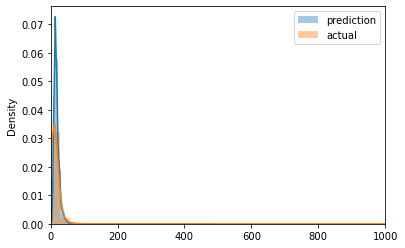

In [91]:
sns.distplot(y_preds, label= 'prediction')
sns.distplot(Y_train, label = 'actual')

# Set x-axis limit to focus on the concentrated region
plt.xlim(0, 1000)  # Adjust the limits according to your data

plt.legend()

5796.848241855864

In [127]:
def read_dataframe(url):
    df = pd.read_parquet(url1)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

    df = df[(df.duration>=1) & (df.duration<=60)]

    categorical =['PULocationID','DOLocationID']
    numerical =['trip_distance']

    df[categorical] = df[categorical].astype(str)

    return df

In [128]:
df_train = read_dataframe(url1)
df_val = read_dataframe(url2)

In [129]:
len(df_train), len(df_val)

(65946, 65946)

In [149]:
df_train['PU_DO'] = df_train['PULocationID'] +'_'+ df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] +'_'+ df_val['DOLocationID']

In [150]:
categorical = ['PU_DO'] #['PULocationID','DOLocationID']
numerical =['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.fit_transform(val_dicts)

In [151]:
target = 'duration'
Y_train = df_train[target].values
Y_val = df_val[target].values

In [158]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_preds = lr.predict(X_val)

mean_squared_error(Y_val, Y_preds, squared=False)

4.754276878808011

In [155]:
lr = Lasso(alpha=0.0001)
lr.fit(X_train, Y_train)

Y_preds = lr.predict(X_val)

mean_squared_error(Y_val, Y_preds, squared=False)

4.937788083312245

In [156]:
lr = Ridge()
lr.fit(X_train, Y_train)

Y_preds = lr.predict(X_val)

mean_squared_error(Y_val, Y_preds, squared=False)

5.704636733905528

In [157]:
%pwd

'/workspaces/mlops-zoomcamp/01-intro'

In [161]:
with open('models/lin_reg.bin','wb') as f_out:
    pickle.dump((dv, lr), f_out)